In [2]:
# Import necessary libraries
import tensorflow as tf
from keras import layers, models
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.utils import plot_model
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve, auc
)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Dataset: https://keras.io/api/datasets/cifar10/

In [ ]:
# Load the CIFAR10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Function to plot the distribution of labels in the dataset
def plot_label_distribution(labels, dataset_name):
    unique, counts = np.unique(labels, return_counts=True)
    plt.figure(figsize=(10, 6))
    sns.barplot(x=unique, y=counts)
    plt.title(f'{dataset_name} Label Distribution')
    plt.xlabel('Digits')
    plt.ylabel('Frequency')
    plt.show()

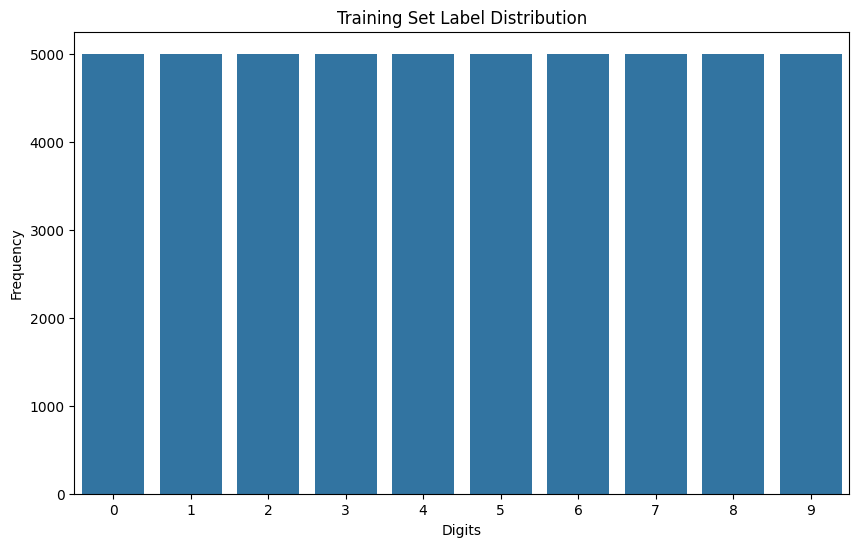

In [ ]:
# Plot the distribution for training and test sets
plot_label_distribution(train_labels, 'Training Set')

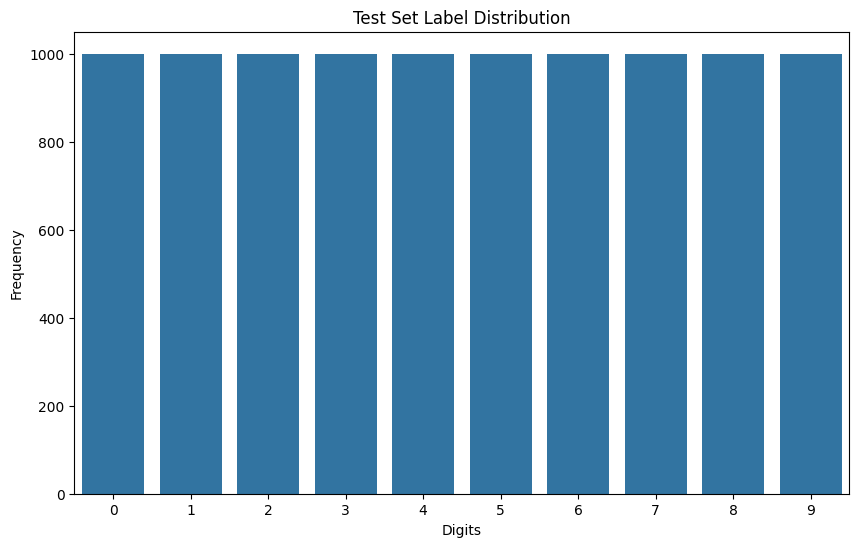

In [ ]:
plot_label_distribution(test_labels, 'Test Set')

In [ ]:
# Function to show random sample images from the dataset
def show_random_images(images, labels, num_samples=10):
    plt.figure(figsize=(10, 4))
    indices = np.random.choice(np.arange(len(images)), num_samples, replace=False)
    for i, idx in enumerate(indices):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[idx], cmap='gray')
        plt.title(f'Label: {labels[idx]}')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

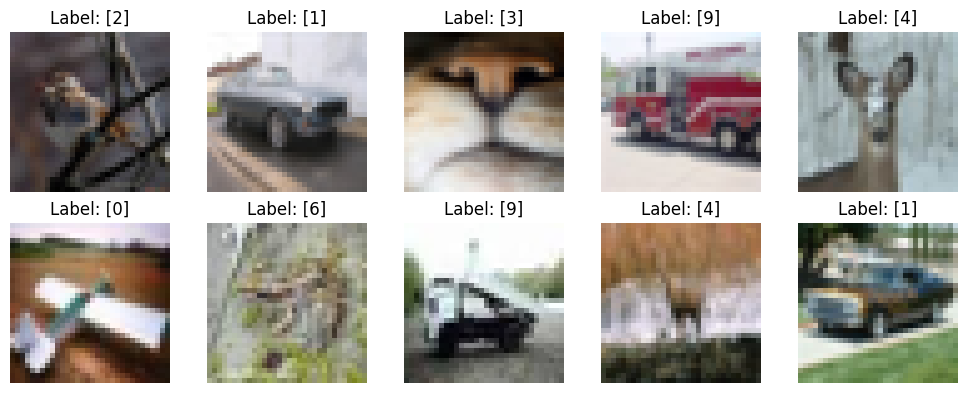

In [ ]:
# Show some random sample images from the training set
show_random_images(train_images, train_labels)

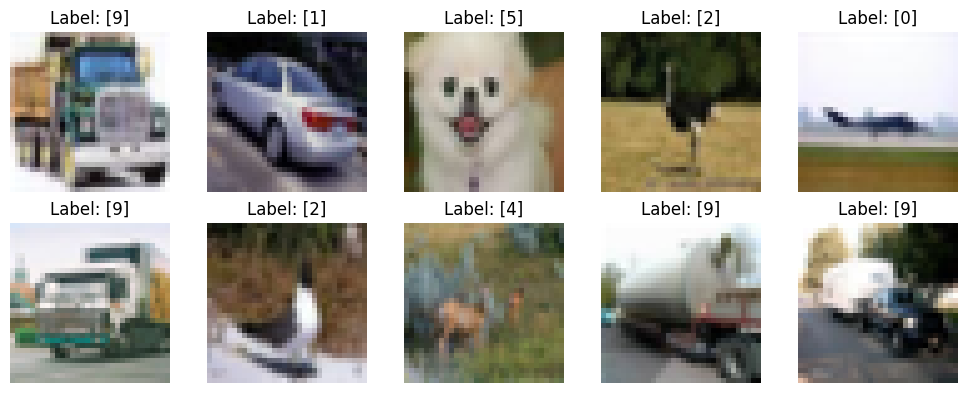

In [ ]:
# Show some random sample images from the training set
show_random_images(test_images, test_labels)

Matrix Representation of Digit [2]:
[[[141 140 133]
  [141 137 130]
  [141 136 127]
  ...
  [169 154 140]
  [166 153 138]
  [163 151 136]]

 [[145 142 133]
  [144 137 128]
  [137 129 119]
  ...
  [163 149 131]
  [160 148 130]
  [153 142 125]]

 [[148 143 132]
  [142 133 123]
  [145 136 125]
  ...
  [163 149 129]
  [166 155 135]
  [155 144 125]]

 ...

 [[169 165 154]
  [181 176 164]
  [182 175 162]
  ...
  [168 156 142]
  [168 156 146]
  [168 157 148]]

 [[152 146 130]
  [161 154 138]
  [160 151 136]
  ...
  [167 154 142]
  [161 151 140]
  [162 153 143]]

 [[146 137 121]
  [156 146 130]
  [148 138 123]
  ...
  [172 158 146]
  [158 148 136]
  [158 149 138]]]


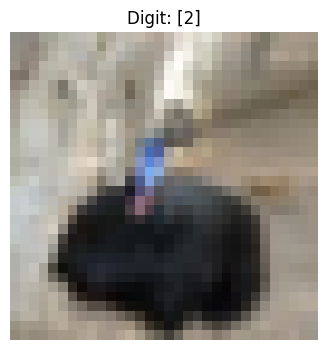

In [ ]:
# Function to show the matrix representation of a single image
def show_matrix_representation(image, label):
    print(f'Matrix Representation of Digit {label}:')
    print(image)

    # Visualize the matrix representation
    plt.figure(figsize=(4, 4))
    plt.imshow(image, cmap='gray')
    plt.title(f'Digit: {label}')
    plt.axis('off')
    plt.show()

# Display the matrix representation of a single image
random_idx = np.random.randint(0, len(train_images))
show_matrix_representation(train_images[random_idx], train_labels[random_idx])

In [ ]:
# Preprocessing: Reshape and normalize
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

# One-hot encode the labels
train_labels_cat = to_categorical(train_labels)
test_labels_cat = to_categorical(test_labels)

In [ ]:
from tensorflow.keras import layers, models

# Define the LeNet-5 architecture
model = models.Sequential()

# C1: Convolutional Layer (6 filters of size 5x5, stride 1)
model.add(layers.Conv2D(6, (5, 5), activation='tanh', input_shape=(32, 32, 3), padding='same'))

# S2: Subsampling Layer (Average Pooling with size 2x2, stride 2)
model.add(layers.AveragePooling2D((2, 2), strides=2))

# C3: Convolutional Layer (16 filters of size 5x5, stride 1)
model.add(layers.Conv2D(16, (5, 5), activation='tanh', padding='valid'))

# S4: Subsampling Layer (Average Pooling with size 2x2, stride 2)
model.add(layers.AveragePooling2D((2, 2), strides=2))

# C5: Convolutional Layer (120 filters of size 1x1, simulating fully connected layer)
model.add(layers.Conv2D(120, (1, 1), activation='tanh'))

# Flatten the output to feed into fully connected layers
model.add(layers.Flatten())

# F6: Fully Connected Layer with 84 units
model.add(layers.Dense(84, activation='tanh'))

# Output layer: 10 units (for 10 classes in MNIST), softmax activation
model.add(layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Print the model summary
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 32, 32, 6)           │             456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_6                  │ (None, 16, 16, 6)           │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 12, 12, 16)          │           2,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling2d_7                  │ (None, 6, 6, 16)            │               0 │
│ (AveragePooling2D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 6, 6, 120)           │           2,040 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4320)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 84)                  │         362,964 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │             850 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 368,726 (1.41 MB)

 Trainable params: 368,726 (1.41 MB)

 Non-trainable params: 0 (0.00 B)

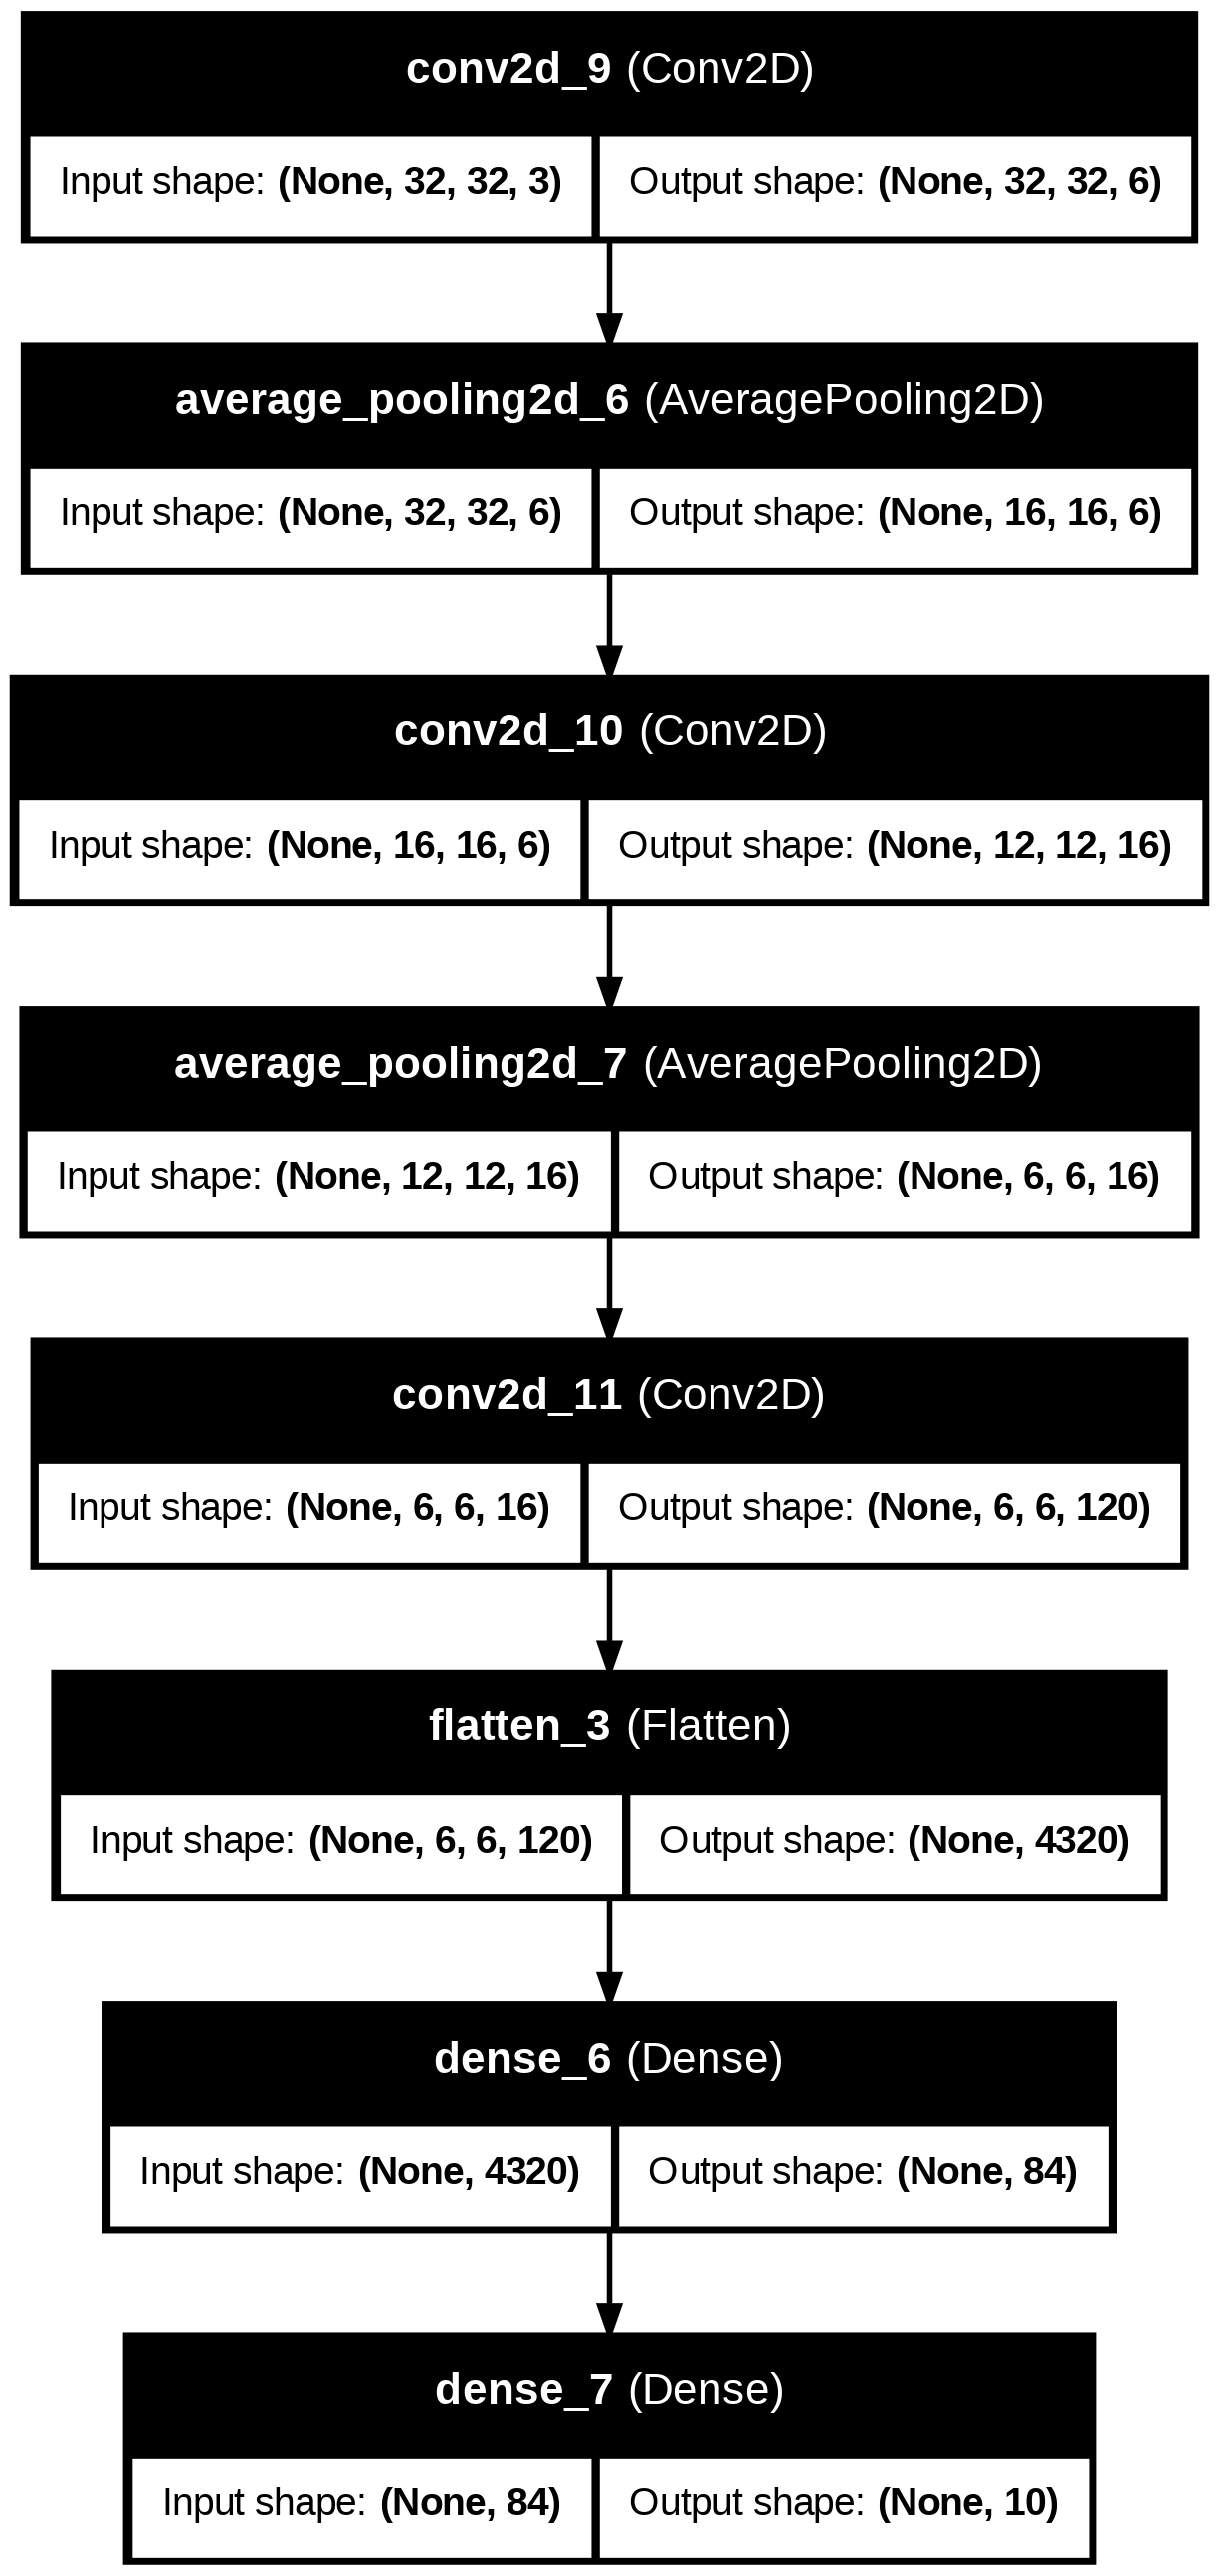

In [ ]:
# Create the plot of the model architecture
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
# Train the model
history = model.fit(
    train_images,
    train_labels_cat,
    epochs=10,
    batch_size=64,
    validation_split=0.2
    )

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.3093 - loss: 1.9454 - val_accuracy: 0.3873 - val_loss: 1.7509
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 37s 60ms/step - accuracy: 0.4145 - loss: 1.6853 - val_accuracy: 0.4349 - val_loss: 1.5898
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 60ms/step - accuracy: 0.4674 - loss: 1.5246 - val_accuracy: 0.4649 - val_loss: 1.5020
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.5020 - loss: 1.4205 - val_accuracy: 0.4863 - val_loss: 1.4624
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 38s 60ms/step - accuracy: 0.5160 - loss: 1.3759 - val_accuracy: 0.4900 - val_loss: 1.4469
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 41s 61ms/step - accuracy: 0.5308 - loss: 1.3363 - val_accuracy: 0.4880 - val_loss: 1.4482
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 39s 58ms/step - accuracy: 0.5442 - loss: 1.3011 - val_accuracy: 0.4944 - val_loss: 1.4323
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 43s 62ms/step - accuracy: 0.5531 - loss: 1.2679 - 

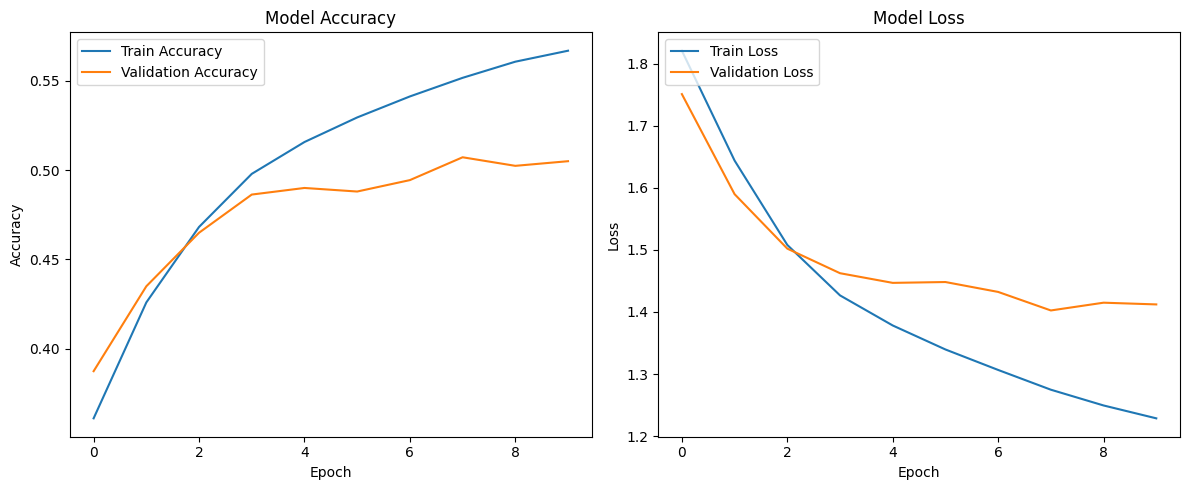

In [ ]:
# Plot training & validation accuracy values
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_images, test_labels_cat)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.5091 - loss: 1.4061
Test accuracy: 0.5060


In [ ]:
# Predictions on test data
predictions = model.predict(test_images)
predicted_classes = np.argmax(predictions, axis=1)

# Confusion Matrix
conf_matrix = confusion_matrix(test_labels, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step
Confusion Matrix:
 [[570  50  49  19  26  11  17  43 164  51]
 [ 36 619  13  22  12  10  14  29  70 175]
 [ 83  32 394  78 114  59  70 106  36  28]
 [ 32  30  85 347  72 149  88  96  50  51]
 [ 50  21 161  49 416  38  92 120  36  17]
 [ 24  28 107 247  68 281  60 107  48  30]
 [ 13  27  82  95  89  29 584  34  20  27]
 [ 48  17  58  56  76  46  26 607  19  47]
 [104  80   9  23  13   9  14  20 660  68]
 [ 52 181  11  21   7  15  25  40  66 582]]


In [ ]:
# Classification Report (Precision, Recall, F1 Score)
class_report = classification_report(test_labels, predicted_classes)
print("\nClassification Report:\n", class_report)


Classification Report:
               precision    recall  f1-score   support

           0       0.56      0.57      0.57      1000
           1       0.57      0.62      0.59      1000
           2       0.41      0.39      0.40      1000
           3       0.36      0.35      0.35      1000
           4       0.47      0.42      0.44      1000
           5       0.43      0.28      0.34      1000
           6       0.59      0.58      0.59      1000
           7       0.50      0.61      0.55      1000
           8       0.56      0.66      0.61      1000
           9       0.54      0.58      0.56      1000

    accuracy                           0.51     10000
   macro avg       0.50      0.51      0.50     10000
weighted avg       0.50      0.51      0.50     10000



In [ ]:
# Misclassification Rate
miss_class_rate = 1 - test_acc
print(f'Misclassification Rate: {miss_class_rate:.4f}')

Misclassification Rate: 0.4940


ROC AUC Score: 0.8829


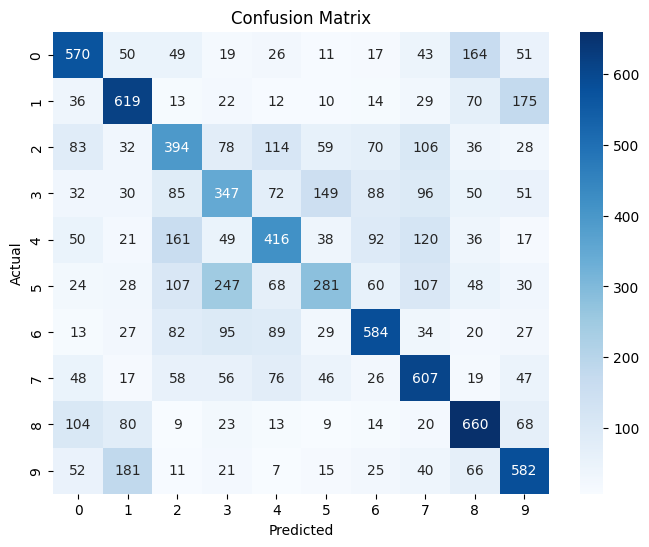

In [ ]:
# ROC AUC for each class
auc_roc = roc_auc_score(test_labels_cat, predictions, multi_class="ovr")
print(f'ROC AUC Score: {auc_roc:.4f}')

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

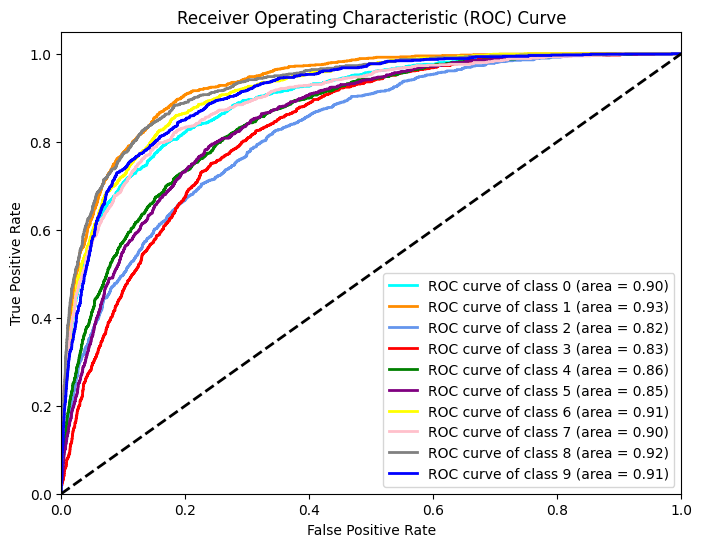

In [ ]:
# AUC-ROC curve for each class
fpr = {}
tpr = {}
roc_auc = {}

for i in range(10):
    fpr[i], tpr[i], _ = roc_curve(test_labels_cat[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple', 'yellow', 'pink', 'gray', 'blue']
for i in range(10):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()